In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.path as pth

## Considering the infinite case
We get a Hamiltonian of the form 
$ \hat{H} = -t \sum_\mathbf{\delta} \sum_{\mathbf{k}} (e^{-i \mathbf{k}\cdot \mathbf{\delta}}\hat{a}^\dagger_\mathbf{k} \hat{b}_{\mathbf{k}} + H.c)$

$ \hat{H} = \sum_{\mathbf{k}} \mathbf{\Psi}^\dagger \mathbf{h(k)} \Psi$ \, where $ \Psi = \begin{pmatrix}  \hat{a_k}\\\hat{b_k}    \end{pmatrix}$ , $ \mathbf{h(k)} = -t\begin{bmatrix} 0 & \Delta_{k}\\ \Delta_{k}^\dagger &0    \end{bmatrix}$ ,
$ \Delta_{k} = \sum_{\delta} e^{i\mathbf{k}\cdot \delta}$

In [2]:
def Delta_k_func(k_vec, a_mag):
    """ Function to build off-diagonal components of h(k) """
    delta_1 = a_mag*0.5*np.array([np.sqrt(3), 1])
    delta_2 = a_mag*0.5*np.array([-np.sqrt(3), 1])
    delta_3 = -a_mag*np.array([0, 1])
    delta_vec = np.vstack([delta_1, delta_2, delta_3])
    
    exponent_vec = np.matmul(delta_vec, k_vec)
    Delta_k = np.sum(np.exp(1.0j*exponent_vec))
    
    return Delta_k

def build_h_matrix(k_x, k_y, a_mag, coupling, sigma_z):
    """ Building h(k) from Delta ks """
    k_vec = np.array([k_x, k_y])
    delta_k_from_func = Delta_k_func(k_vec, a_mag)
    delta_k_transpose = np.conjugate(delta_k_from_func)
    h_of_k = -coupling*np.array([[sigma_z, delta_k_from_func],[delta_k_transpose, -sigma_z]])

    return h_of_k

def find_eigvals(k_x, k_y, a_mag, coupling, sigma_z):
    """"""
    eig_band_1 = np.zeros((len(k_x), len(k_y)))
    eig_band_2 = np.zeros((len(k_x), len(k_y)))

    for i in range(len(k_x)):
            for j in range(len(k_y)):
                h_matrix = build_h_matrix(kx[i], ky[j], a_mag, coupling, sigma_z)

                eigvals = np.linalg.eigvalsh(h_matrix)

                eig_band_1[i,j] = eigvals[0]
                eig_band_2[i,j] = eigvals[1]

                
                
    return eig_band_1, eig_band_2


In [3]:
# Defining Constants 
a_mag = 2
coupling = 1.0
mag_K = 4*np.pi/(3*np.sqrt(3)*a_mag)
# Specifying total k space
kx = np.linspace(-mag_K, mag_K, 100)
ky = np.linspace(-mag_K, mag_K, 100)
# Building meshgrid for plotting
kxv, kyv = np.meshgrid(kx, ky)
# Calculating bands
band_1, band_2 = find_eigvals(kx, ky, a_mag, coupling, 0)

## Plotting

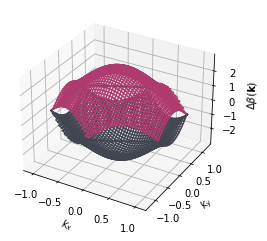

In [26]:


fig_3d = plt.figure(figsize=(4,4))
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Outlining a hexagon specifying Brillouin zone
hexagon_coord_x = np.array([2*np.pi/(3*a_mag), 0, -2*np.pi/(3*a_mag),
                            -2*np.pi/(3*a_mag), 0, 2*np.pi/(3*a_mag),2*np.pi/(3*a_mag)])
hexagon_coord_y = np.array([2*np.pi/(3*np.sqrt(3)*a_mag), mag_K,
                            2*np.pi/(3*np.sqrt(3)*a_mag), -2*np.pi/(3*np.sqrt(3)*a_mag),
                             -mag_K, -2*np.pi/(3*np.sqrt(3)*a_mag), 2*np.pi/(3*np.sqrt(3)*a_mag) ])
hexagon_poly_points = list(zip(hexagon_coord_x, hexagon_coord_y))
hexagon_path = pth.Path(hexagon_poly_points)
coords = np.transpose(np.vstack([kxv.ravel(), kyv.ravel()]))
only_brillouin = np.reshape(hexagon_path.contains_points(coords),(100,100))

kxv_brill = np.where(only_brillouin, kxv, np.nan)
kyv_brill = np.where(only_brillouin, kyv, np.nan)
band_1_brill = np.where(only_brillouin, band_1, np.nan)
band_2_brill = np.where(only_brillouin, band_2, np.nan)

hexagon = ax_3d.plot(hexagon_coord_x, hexagon_coord_y, np.zeros(len(hexagon_coord_x)),
                     linestyle='-', linewidth=2, color='#424651')


# Plotting bands 
surf_1 = ax_3d.plot_wireframe(kxv_brill, kyv_brill, band_1_brill, cmap=cm.coolwarm, antialiased=True, color='#424651')
surf_2 = ax_3d.plot_wireframe(kxv_brill, kyv_brill, band_2_brill, cmap=cm.coolwarm, antialiased=True, color='#AF3B6E')
# Labels 
ax_3d.set_xlabel('$k_{x}$')
ax_3d.set_ylabel('$k_{y}$')
ax_3d.set_zlabel(r'$\Delta \beta(\mathbf{k})$')
fig_3d.savefig('../Twisted Fibre/Figures/honeycomb unit cell plot.svg', dpi = 300)
plt.show()

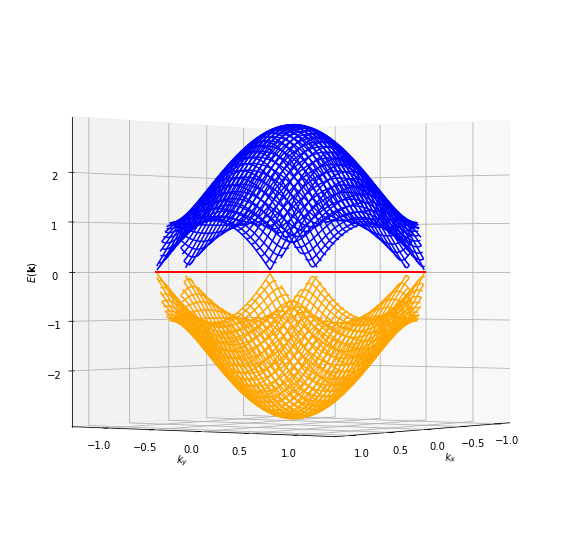

In [7]:
# Changing viewing angle to see Dirac cones
ax_3d.view_init(0, 35)
fig_3d

## Now we run it with a Sigma z term (on diagonal splitting)
 $ \mathbf{h(k)} = -t\begin{bmatrix} +M & \Delta_{k}\\ \Delta_{k}^\dagger & -M    \end{bmatrix}$ 

In [8]:
M = 0.5
band_1_split, band_2_split = find_eigvals(kx, ky, a_mag, coupling, M)

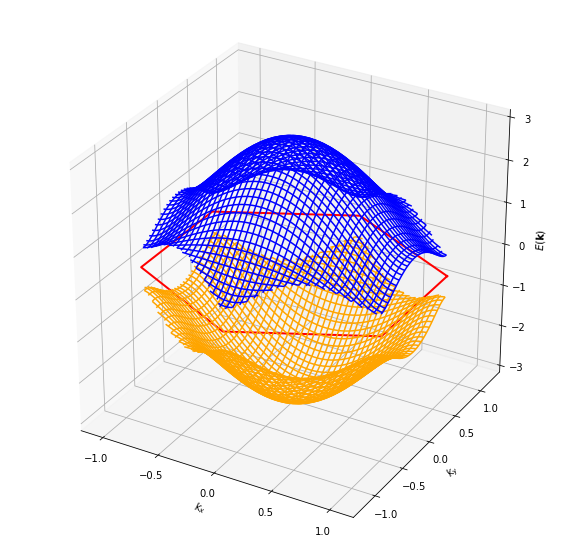

In [9]:
fig_3d_split = plt.figure(figsize=(10,10))
ax_3d_split = fig_3d_split.add_subplot(111, projection='3d')

hexagon = ax_3d_split.plot(hexagon_coord_x, hexagon_coord_y, np.zeros(len(hexagon_coord_x)),
                     linestyle='-', linewidth=2, color='red')

band_1_split_brill = np.where(only_brillouin, band_1_split, np.nan)
band_2_split_brill = np.where(only_brillouin, band_2_split, np.nan)
# Plotting bands 
surf_1 = ax_3d_split.plot_wireframe(kxv_brill, kyv_brill, band_1_split_brill, cmap=cm.coolwarm, antialiased=True, color='orange')
surf_2 = ax_3d_split.plot_wireframe(kxv_brill, kyv_brill, band_2_split_brill, cmap=cm.coolwarm, antialiased=True, color='blue')
# Labels 
ax_3d_split.set_xlabel('$k_{x}$')
ax_3d_split.set_ylabel('$k_{y}$')
ax_3d_split.set_zlabel('$E(\mathbf{k})$')
plt.show()

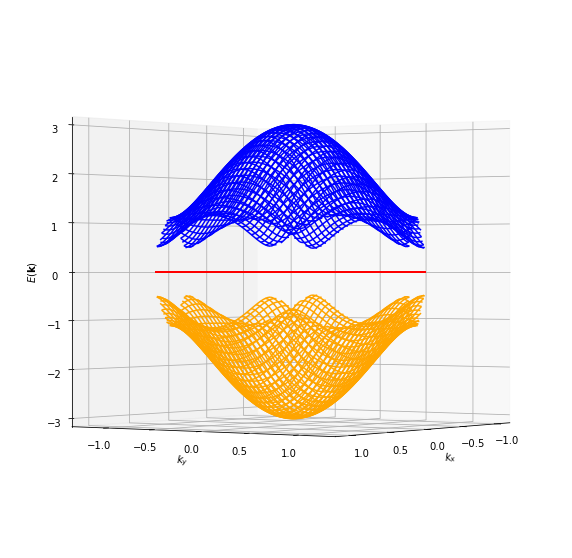

In [10]:
ax_3d_split.view_init(0, 35)
fig_3d_split

## Calculating Chern Numbers

In [106]:
# Now we need to work with the eigenvectors 
# Using a new function to keep the old one fast 
# Easiest if I run over a Torus, need to reform the BZ

def find_eigvecs(k_mag, a_mag, coupling, sigma_z):
    """"""
    eig_band_1 = np.zeros((len(k_mag), len(k_mag)))
    eig_band_2 = np.zeros((len(k_mag), len(k_mag)))
    eig_vecs_band_1 = np.zeros((len(k_mag), len(k_mag), 2), dtype=np.complex64)
    eig_vecs_band_2 = np.zeros((len(k_mag), len(k_mag), 2), dtype=np.complex64)

    for i in range(len(k_mag)):
            for j in range(len(k_mag)):
                
                k_1 = k_mag[i]*np.array([np.sqrt(3), 1]) 
                k_2 = k_mag[j]*np.array([np.sqrt(3), -1])
                kx = k_1[0] + k_2[0]
                ky = k_1[1] + k_2[1]

                h_matrix = build_h_matrix(kx, ky, a_mag, coupling, sigma_z)
                eigvals, eigvecs = np.linalg.eigh(h_matrix)

                eig_band_1[i,j] = eigvals[0]
                eig_band_2[i,j] = eigvals[1]
                eig_vecs_band_1[i,j,:] = eigvecs[:,0]
                eig_vecs_band_2[i,j,:] = eigvecs[:,1]

                
                
    return eig_band_1, eig_band_2, eig_vecs_band_1, eig_vecs_band_2

## Topologically non-trivial case

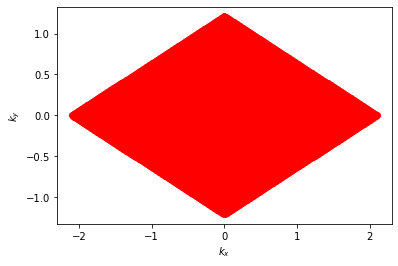

In [131]:
# Specifying total k space side length
b_mag = np.linspace(-mag_K/2, mag_K/2, 200)

# Plotting discretised k-space to map to torus
kx_list = np.zeros((len(b_mag),len(b_mag)))
ky_list = np.zeros((len(b_mag),len(b_mag)))

for i in range(len(b_mag)):
    for j in range(len(b_mag)):      
        k_1 = b_mag[i]*np.array([np.sqrt(3), 1])  
        k_2 = b_mag[j]*np.array([np.sqrt(3), -1]) 
        kx = k_1[0] + k_2[0]
        ky = k_1[1] + k_2[1]
        kx_list[i,j] = kx
        ky_list[i,j] = ky

plt.scatter(kx_list, ky_list, color='red')
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [135]:
band_1_tor, band_2_tor, vecu_1, vecu_2 = find_eigvecs(b_mag, a_mag, coupling, M/2)

Uk1_1 = np.sum(np.conjugate(vecu_1)*np.roll(vecu_1, -1, axis=1), axis=2) / np.abs(np.sum(np.conjugate(vecu_1)*np.roll(vecu_1, -1, axis=1), axis=2))
Uk2_1 = np.sum(np.conjugate(vecu_1)*np.roll(vecu_1, -1, axis=0), axis=2) / np.abs(np.sum(np.conjugate(vecu_1)*np.roll(vecu_1, -1, axis=0), axis=2))

Uk1_2 = np.sum(np.conjugate(vecu_2)*np.roll(vecu_2, -1, axis=0), axis=2) / np.abs(np.sum(np.conjugate(vecu_2)*np.roll(vecu_1, -1, axis=0), axis=2))
Uk2_2 = np.sum(np.conjugate(vecu_2)*np.roll(vecu_2, -1, axis=1), axis=2) / np.abs(np.sum(np.conjugate(vecu_2)*np.roll(vecu_1, -1, axis=1), axis=2))
# U2_k1 = np.sum(np.conjugate(vecu_2)*np.roll(vecu_2, -1, axis=0),axis=2) / np.abs(np.sum(np.conjugate(vecu_2)*np.roll(vecu_2, -1, axis=0),axis=2))
# U2_k2 = np.sum(np.conjugate(vecu_2)*np.roll(vecu_2, -1, axis=1),axis=2) / np.abs(np.sum(np.conjugate(vecu_2)*np.roll(vecu_2, -1, axis=1),axis=2))

F_12_1 = np.log((Uk1_1*np.roll(Uk2_1, -1, axis=0))/(np.roll(Uk1_1, -1, axis=1)*Uk2_1))
print(np.shape(np.sum(F_12_1)))
print(np.max(F_12_1/1.0j))
c_1 = np.sum(F_12_1) * 1/(2*np.pi*1.0j)
print(c_1)

()
(1.0374122+4.470349e-08j)
(-5.454664962162961e-08+3.1532726354304074e-07j)


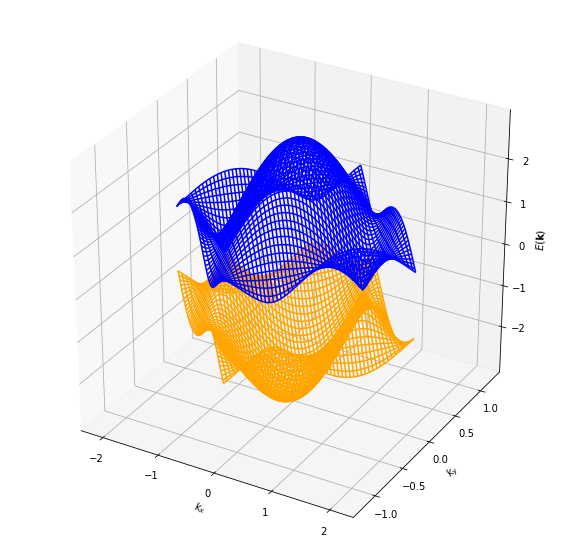

In [133]:
fig_3d_torus = plt.figure(figsize=(10,10))
ax_3d_torus = fig_3d_torus.add_subplot(111, projection='3d')


# Plotting bands 
surf_tor_1 = ax_3d_torus.plot_wireframe(kx_list, ky_list, band_1_tor, cmap=cm.coolwarm, antialiased=True, color='orange')
surf_tor_2 = ax_3d_torus.plot_wireframe(kx_list, ky_list, band_2_tor, cmap=cm.coolwarm, antialiased=True, color='blue')
# Labels 
ax_3d_torus.set_xlabel('$k_{x}$')
ax_3d_torus.set_ylabel('$k_{y}$')
ax_3d_torus.set_zlabel('$E(\mathbf{k})$')
plt.show()

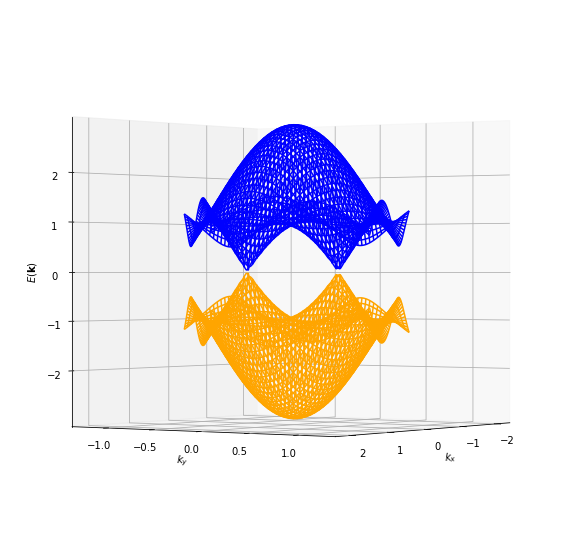

In [134]:
ax_3d_torus.view_init(0, 35)
fig_3d_torus

In [74]:
# np.shape(np.abs(np.sum(np.conjugate(vecu_1)*np.roll(vecu_1,1,axis=0),axis=2)))
# np.conjugate(vecu_1)

(100, 100)


In [105]:
hexagon_coord_x = np.array([2*np.pi/(3*a_mag), 0, -2*np.pi/(3*a_mag),
                            -2*np.pi/(3*a_mag), 0, 2*np.pi/(3*a_mag),2*np.pi/(3*a_mag)])
hexagon_coord_y = np.array([2*np.pi/(3*np.sqrt(3)*a_mag), mag_K,
                            2*np.pi/(3*np.sqrt(3)*a_mag), -2*np.pi/(3*np.sqrt(3)*a_mag),
                             -mag_K, -2*np.pi/(3*np.sqrt(3)*a_mag), 2*np.pi/(3*np.sqrt(3)*a_mag) ])
hexagon_poly_points = list(zip(hexagon_coord_x, hexagon_coord_y))
hexagon_path = pth.Path(hexagon_poly_points)
coords = np.transpose(np.vstack([kxv.ravel(), kyv.ravel()]))
only_brillouin = np.reshape(hexagon_path.contains_points(coords),(100,100))
print(np.where(only_brillouin, kxv, np.nan))
print(kxv*only_brillouin)
print(np.shape(kxv),np.shape(only_brillouin))


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]
 ...
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]]
(100, 100) (100, 100)


In [107]:
test = np.array([[1,2],[3,4]])
test_bool = np.array([[True, False],[False,True]])
np.where(test_bool, test, np.nan)

array([[ 1., nan],
       [nan,  4.]])

In [115]:
np.broadcast_to(only_brillouin, (100,100,2))

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (100,100) and requested shape (100,100,2)